<a href="https://colab.research.google.com/github/ShadowwManan/FUTURE_ML_01/blob/main/Telco_Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier


In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please upload the file to your Colab environment.")
    # Exiting script if data cannot be loaded
    exit()

# Display initial information
print("\n--- Initial Data Head ---")
print(df.head())

print("\n--- Data Information (Data Types and Missing Values) ---")
df.info()

Data loaded successfully.

--- Initial Data Head ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Y

In [ ]:
# 2.1 Handling 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(f"\nMissing TotalCharges imputed with median: {median_total_charges}")


df.drop('customerID', axis=1, inplace=True)

# 2.2 Standardizing Categorical Columns
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'MultipleLines']:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

# 2.3 Convert 'SeniorCitizen' from integer to object/categorical type
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

print("\n--- Data Cleaning Complete. Current Data Types ---")
print(df.dtypes)



Missing TotalCharges imputed with median: 1397.475

--- Data Cleaning Complete. Current Data Types ---
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


/tmp/ipython-input-1939096557.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


/tmp/ipython-input-2178677137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


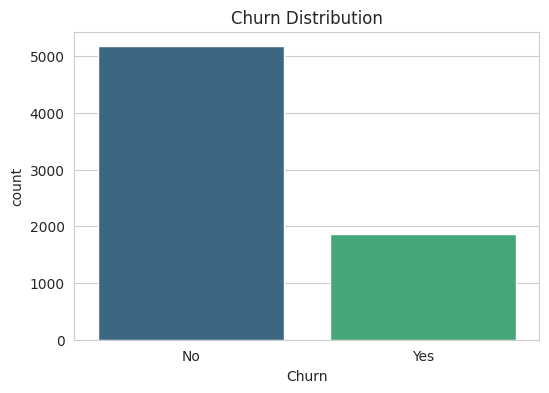


Churn Rate:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


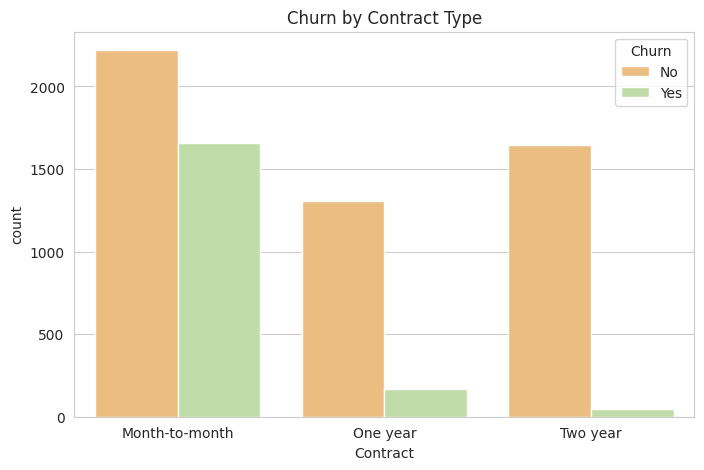

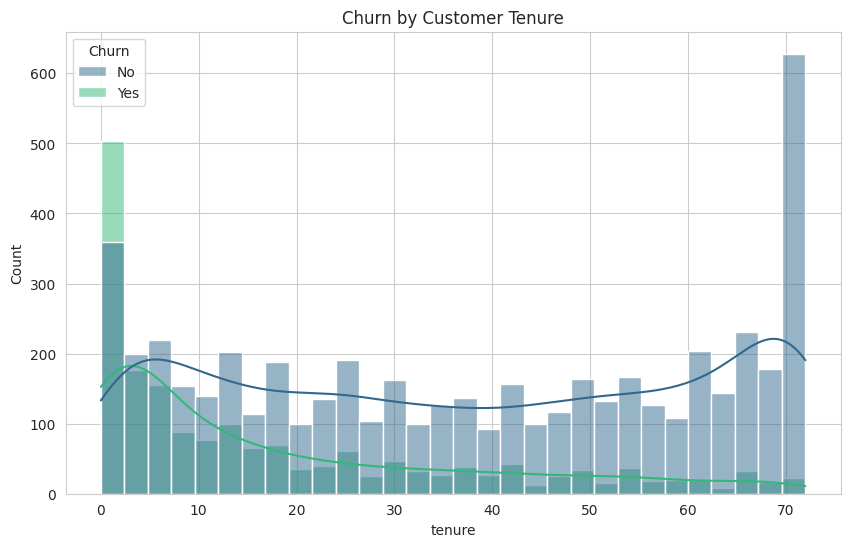

In [ ]:
# 3.1 Churn Distribution (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nChurn Rate:\n{churn_rate}")

# 3.2 Churn vs Contract Type (Key Driver)
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Spectral')
plt.title('Churn by Contract Type')
plt.show()

# 3.3 Churn vs Tenure (Length of Stay)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='viridis')
plt.title('Churn by Customer Tenure')
plt.show()

In [ ]:
# Separate target variable (Y) and features (X)
X = df.drop('Churn', axis=1)
Y = df['Churn']

# 4.1 Label Encoding for Binary Categorical Features (Yes/No and Male/Female)
le = LabelEncoder()
binary_cols = [col for col in X.columns if X[col].dtype == 'object' and len(X[col].unique()) == 2]

for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# Encode the target variable 'Churn': 'No' -> 0, 'Yes' -> 1
Y = le.fit_transform(Y)

# 4.2 One-Hot Encoding for Multi-Category Features (e.g., InternetService, Contract)
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n--- Feature Matrix X after Encoding (Head) ---")
print(X.head())


--- Feature Matrix X after Encoding (Head) ---
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0       0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85                        False               False              False              False                                  False                            True                       False
1       1              0        0           0      34             1              0               1             0                 1      

In [ ]:
# 5.1 Splitting the data
# Use stratification to ensure the training and testing sets have a similar churn ratio
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 5.2 Scaling Numerical Features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5.3 Training the Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, Y_train)

# 5.4 Prediction and Evaluation
Y_pred = model.predict(X_test)

print("\n--- Model Evaluation (Logistic Regression) ---")
print("\nConfusion Matrix (Actual Rows vs Predicted Columns):")
# 0 = No Churn, 1 = Churn
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
# Key metrics (Precision, Recall, F1-Score) for Churn (1) and No Churn (0)
print(classification_report(Y_test, Y_pred, target_names=['No Churn (0)', 'Churn (1)']))

# 5.5 Feature Importance (Model Coefficients)
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("\n--- Top 10 Features Impacting Churn (Positive coefficient means higher likelihood of Churn) ---")
print(coefficients.head(10))

print("\n--- Bottom 10 Features Preventing Churn (Negative coefficient means lower likelihood of Churn) ---")
print(coefficients.tail(10))


Training set size: 5634
Testing set size: 1409

--- Model Evaluation (Logistic Regression) ---

Confusion Matrix (Actual Rows vs Predicted Columns):
[[927 108]
 [166 208]]

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.85      0.90      0.87      1035
   Churn (1)       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


--- Top 10 Features Impacting Churn (Positive coefficient means higher likelihood of Churn) ---
                                Coefficient
InternetService_Fiber optic        1.041600
TotalCharges                       0.500267
PaymentMethod_Electronic check     0.385638
PaperlessBilling                   0.373527
MultipleLines                      0.332594
StreamingMovies                    0.321358
StreamingTV                        0.318727
SeniorCitizen              

In [ ]:
from xgboost import XGBClassifier

print("--- Training XGBoost Model ---")
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, Y_train)

print("XGBoost Model Trained Successfully.")

--- Training XGBoost Model ---
XGBoost Model Trained Successfully.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:41:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("--- Evaluating XGBoost Model ---")

# Make predictions on the test set
Y_pred_xgb = xgb_model.predict(X_test)

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(Y_test, Y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(Y_test, Y_pred_xgb, target_names=['No Churn (0)', 'Churn (1)']))

--- Evaluating XGBoost Model ---

Confusion Matrix (XGBoost):
[[906 129]
 [173 201]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

No Churn (0)       0.84      0.88      0.86      1035
   Churn (1)       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
print("--- XGBoost Feature Importance ---")

# Get feature importances from the XGBoost model
feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})

feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)

print("\nTop 10 Features Impacting Churn (XGBoost):")
print(feature_importances_xgb.head(10))

print("\nBottom 10 Features Impacting Churn (XGBoost):")
print(feature_importances_xgb.tail(10))

--- XGBoost Feature Importance ---

Top 10 Features Impacting Churn (XGBoost):
                           Feature  Importance
16     InternetService_Fiber optic    0.500457
19               Contract_Two year    0.136741
17              InternetService_No    0.074103
18               Contract_One year    0.071365
12                 StreamingMovies    0.024219
4                           tenure    0.021132
6                    MultipleLines    0.015296
21  PaymentMethod_Electronic check    0.012520
7                   OnlineSecurity    0.011694
5                     PhoneService    0.011336

Bottom 10 Features Impacting Churn (XGBoost):
                                  Feature  Importance
15                           TotalCharges    0.010169
8                            OnlineBackup    0.010136
1                           SeniorCitizen    0.009974
3                              Dependents    0.009488
14                         MonthlyCharges    0.008793
22             PaymentMethod_Mail